Introducción

Este proyecto tiene como objetivo ayudar a optimizar los gastos de marketing para Y.Afisha, una empresa que ofrece servicios en línea. A través del análisis de datos de registros del servidor, pedidos y estadísticas de gastos de marketing, buscamos comprender cómo los clientes utilizan el servicio, cuándo comienzan a comprar, cuánto dinero aportan a la compañía y cuándo los ingresos cubren el costo de adquisición de los clientes.

Visitas:

¿Cuántas personas lo usan cada día, semana y mes?
¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).
¿Cuál es la duración de cada sesión?
¿Con qué frecuencia los usuarios y las usuarias regresan?

Ventas:

¿Cuándo la gente empieza a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d.  Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).
¿Cuántos pedidos hacen durante un período de tiempo dado?
¿Cuál es el tamaño promedio de compra?
¿Cuánto dinero traen? (LTV)

Marketing:

¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)
¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
¿Cuán rentables eran las inversiones? (ROMI)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
visit = pd.read_csv('/visits_log_us.csv')
orders = pd.read_csv('/orders_log_us.csv')
mrk = pd.read_csv('/costs_us.csv')


In [ ]:
visit.info()
visit['End Ts']=pd.to_datetime(visit['End Ts'])
visit['Start Ts']=pd.to_datetime(visit['Start Ts'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [ ]:
visit.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [ ]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [ ]:
orders ['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [ ]:
mrk.info()
mrk.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [ ]:
mrk['dt']= pd.to_datetime(mrk['dt'])
mrk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


**Metricas**

Visitas

In [ ]:
visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [ ]:
# Calcular DAU, WAU y MAU
dau = visit.groupby(visit['Start Ts'].dt.date)['Uid'].nunique().mean()
wau = visit.groupby(visit['Start Ts'].dt.to_period('W'))['Uid'].nunique().mean()
mau = visit.groupby(visit['Start Ts'].dt.to_period('M'))['Uid'].nunique().mean()

# Mostrar los resultados
print("DAU promedio:", dau)
print("WAU promedio:", wau)
print("MAU promedio:", mau)

DAU promedio: 907.9917582417582
WAU promedio: 5716.245283018868
MAU promedio: 23228.416666666668


In [ ]:
# Duración promedio de cada sesión
visit['Duration'] = (visit['End Ts'] - visit['Start Ts']).dt.total_seconds() / 60  # Duración en minutos
average_session_duration = visit['Duration'].mean()

In [ ]:
# Ordenar los datos por usuario y tiempo de inicio de la sesión
visit = visit.sort_values(by=['Uid', 'Start Ts'])

# Calcular la diferencia en días entre visitas consecutivas para cada usuario
visit['Return_Diff'] = visit.groupby('Uid')['Start Ts'].diff().dt.days

# Calcular la frecuencia de retorno promedio de los usuarios (ignorando el primer valor nulo para cada usuario)
user_return_frequency = visit.groupby('Uid')['Return_Diff'].mean()

# Mostrar el resultado
print("Frecuencia de retorno promedio (en días):")
print(user_return_frequency.head())

Frecuencia de retorno promedio (en días):
Uid
11863502262781       NaN
49537067089222       NaN
297729379853735      NaN
313578113262317     86.5
325320750514679    148.0
Name: Return_Diff, dtype: float64


In [ ]:
# Calcular el número de sesiones por usuario por día
sessions_per_user_per_day = visit.groupby(['Uid', visit['Start Ts'].dt.date])['Start Ts'].count()

# Calcular el promedio de sesiones por usuario al día
average_sessions_per_user_per_day = sessions_per_user_per_day.groupby('Start Ts').mean().mean()

# Imprimir el resultado
print("Número promedio de sesiones por usuario al día:", average_sessions_per_user_per_day)

Número promedio de sesiones por usuario al día: 1.082169644003972


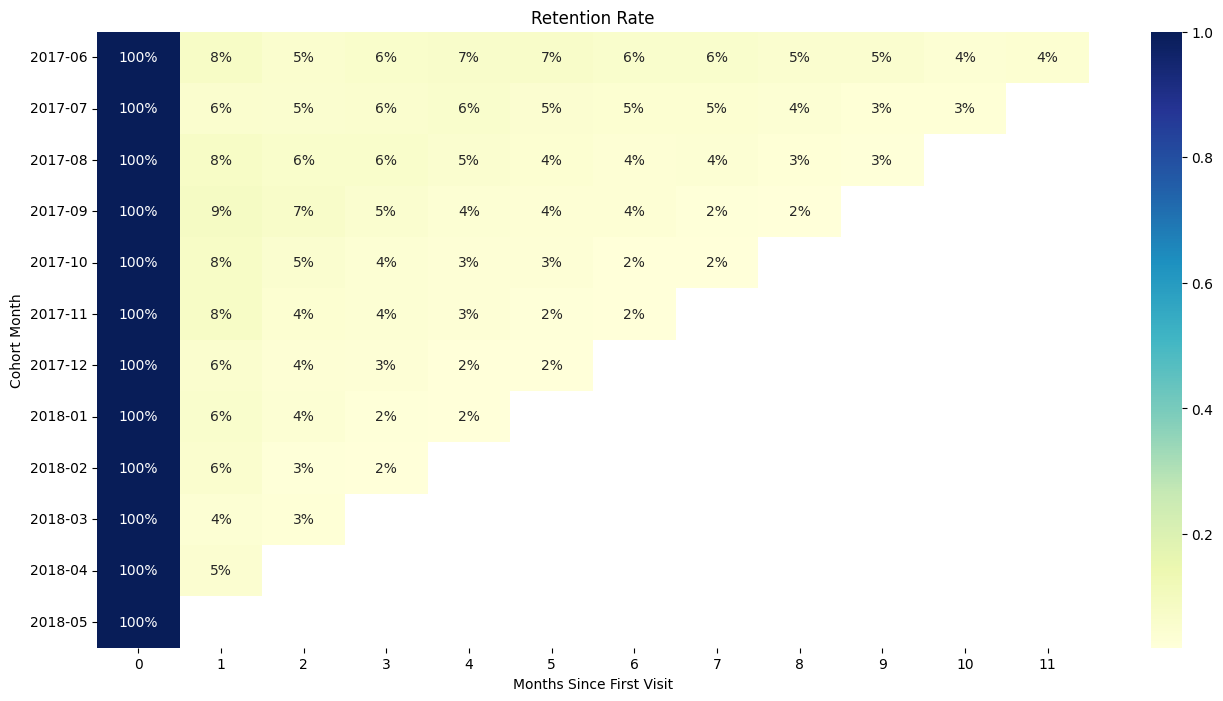

In [ ]:
# Crear una columna para el mes de la visita
visit['VisitMonth'] = visit['Start Ts'].dt.to_period('M')

# Crear una tabla de cohortes
cohort_data = visit.groupby(['Uid', 'VisitMonth']).size().reset_index(name='Sessions')

# Crear el mes de la primera visita (cohorte) para cada usuario
cohort_data['CohortMonth'] = cohort_data.groupby('Uid')['VisitMonth'].transform('min')

# Calcular la diferencia en meses desde la primera visita
cohort_data['MonthNumber'] = (cohort_data['VisitMonth'] - cohort_data['CohortMonth']).apply(lambda x: x.n)

# Crear una tabla de retención
cohort_pivot = cohort_data.pivot_table(index='CohortMonth', columns='MonthNumber', values='Uid', aggfunc='nunique')

# Calcular la tasa de retención
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

# Visualizar la tasa de retención con un heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Retention Rate')
plt.xlabel('Months Since First Visit')
plt.ylabel('Cohort Month')
plt.show()

Preguntas planteadas:
Visita:

¿Cuántas personas lo usan cada día, semana y mes?
Número de usuarios únicos por día: Varía de 300 a 1431 usuarios únicos por día.
Número de usuarios únicos por semana: Varía de 1439 a 8194 usuarios únicos por semana.
Número de usuarios únicos por mes: Varía de 8561 a 25300 usuarios únicos por mes.
¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).
Número de sesiones por día: Varía de 306 a 1492 sesiones por día.
¿Cuál es la duración de cada sesión?
Duración promedio de cada sesión: 10.73 minutos.
¿Con qué frecuencia los usuarios y las usuarias regresan?
Frecuencia de retorno de los usuarios (en días): La mayoría de los usuarios no tienen una frecuencia de retorno definida. Solo unos pocos usuarios muestran una frecuencia de retorno de alrededor de 148 días.

Ventas

In [ ]:
# Unir los datos de visitas y pedidos
merged_data = pd.merge(visit, orders, on='Uid', how='left')

# Eliminar las filas donde no hay información de compra
merged_data = merged_data.dropna(subset=['Buy Ts'])

# Filtrar las filas donde 'Buy Ts' es anterior a 'Start Ts'
merged_data = merged_data[merged_data['Buy Ts'] >= merged_data['Start Ts']]

# Calcular el tiempo transcurrido entre el registro y la primera compra para cada usuario
merged_data['Time to Conversion'] = (merged_data['Buy Ts'] - merged_data['Start Ts']).dt.days

<ipython-input-15-499f67ddd2e2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Time to Conversion'] = (merged_data['Buy Ts'] - merged_data['Start Ts']).dt.days


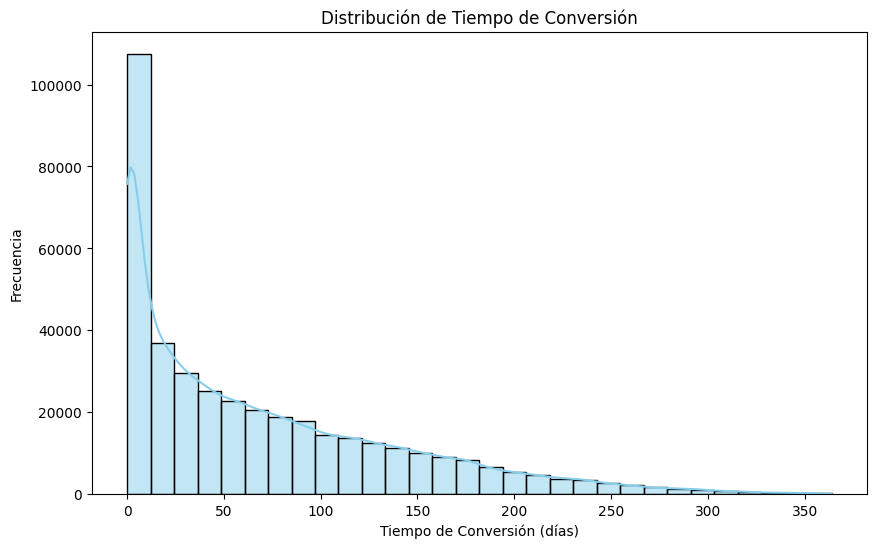

Tiempo de conversión promedio (días): 69.79503889272513


In [ ]:
# Visualizar la distribución de tiempo de conversión
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Time to Conversion'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribución de Tiempo de Conversión')
plt.xlabel('Tiempo de Conversión (días)')
plt.ylabel('Frecuencia')
plt.show()

# Calcular y mostrar el tiempo de conversión promedio
average_conversion_time = merged_data['Time to Conversion'].mean()
print("Tiempo de conversión promedio (días):", average_conversion_time)

In [ ]:
# Seleccionar el período de tiempo
start_date = '2017-06-01'
end_date = '2018-06-01'

# Filtrar los pedidos dentro del período de tiempo dado
orders_within_period = orders[(orders['Buy Ts'] >= start_date) & (orders['Buy Ts'] <= end_date)]

# Número de pedidos durante el período de tiempo dado
orders_count = len(orders_within_period)

# Tamaño promedio de compra
average_order_size = orders_within_period['Revenue'].mean()

# Dinero total generado durante el período de tiempo dado
total_revenue = orders_within_period['Revenue'].sum()

# Mostrar los resultados
print("Número de pedidos durante el período de tiempo dado:", orders_count)
print("Tamaño promedio de compra durante el período de tiempo dado:", average_order_size)
print("Dinero total generado durante el período de tiempo dado:", total_revenue)

Número de pedidos durante el período de tiempo dado: 50414
Tamaño promedio de compra durante el período de tiempo dado: 4.9996782639742925
Dinero total generado durante el período de tiempo dado: 252053.77999999997


Información de las cohortes:
 Order Month           2017-06  2017-07  2017-08  2017-09  2017-10  2017-11  \
First Purchase Month                                                         
2017-06                2354.0    177.0    174.0    226.0    292.0    218.0   
2017-07                   0.0   2186.0    100.0    120.0    104.0     72.0   
2017-08                   0.0      0.0   1533.0    108.0    100.0     81.0   
2017-09                   0.0      0.0      0.0   2933.0    219.0    161.0   
2017-10                   0.0      0.0      0.0      0.0   4964.0    314.0   
2017-11                   0.0      0.0      0.0      0.0      0.0   4813.0   
2017-12                   0.0      0.0      0.0      0.0      0.0      0.0   
2018-01                   0.0      0.0      0.0      0.0      0.0      0.0   
2018-02                   0.0      0.0      0.0      0.0      0.0      0.0   
2018-03                   0.0      0.0      0.0      0.0      0.0      0.0   
2018-04                   0.0     

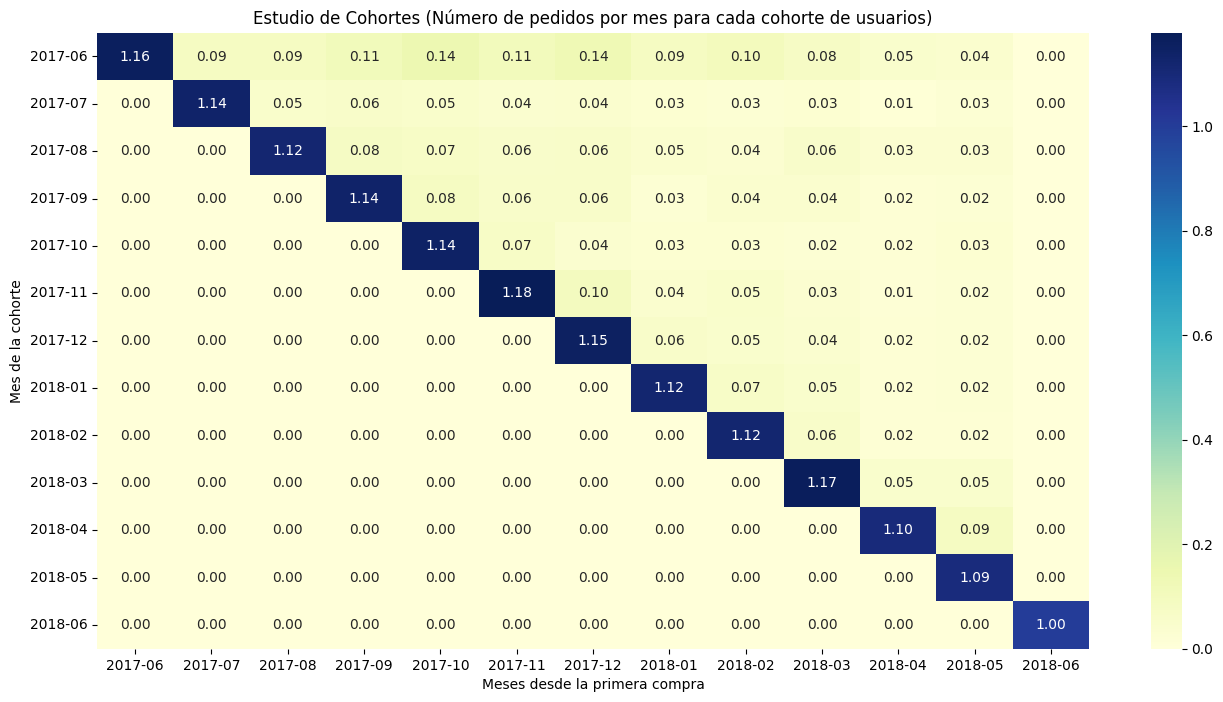

In [ ]:
# Calcular la primera compra de cada usuario
first_purchase = orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_purchase.columns = ['Uid', 'First Purchase']

# Agregar la columna 'First Purchase' al DataFrame de pedidos, usando sufijos para evitar conflictos
orders = pd.merge(orders, first_purchase, on='Uid', suffixes=('', '_first'))

# Calcular el mes de la primera compra
orders['First Purchase Month'] = orders['First Purchase'].dt.to_period('M')

# Calcular el mes de cada compra
orders['Order Month'] = orders['Buy Ts'].dt.to_period('M')

# Agrupar por cohorte de usuarios y mes de compra, y calcular el número de pedidos
orders_by_cohort = orders.groupby(['First Purchase Month', 'Order Month']).size().unstack().fillna(0)

# Calcular el tamaño de cada cohorte
cohort_sizes = orders.groupby('First Purchase Month')['Uid'].nunique()

# Normalizar el número de pedidos por el tamaño de la cohorte
retention_matrix = orders_by_cohort.divide(cohort_sizes, axis=0)

# Verificar la información de las cohortes
print("Información de las cohortes:\n", orders_by_cohort)

# Ordenar los resultados en el orden correcto
retention_matrix = retention_matrix.sort_index().sort_index(axis=1)

# Visualizar los resultados del estudio de cohortes con un heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Estudio de Cohortes (Número de pedidos por mes para cada cohorte de usuarios)')
plt.xlabel('Meses desde la primera compra')
plt.ylabel('Mes de la cohorte')
plt.show()

In [ ]:
# Tamaño promedio de compra
average_order_size = orders['Revenue'].mean()

# Dinero total generado
total_revenue = orders['Revenue'].sum()

# Mostrar los resultados
print("Tamaño promedio de compra:", average_order_size)
print("Dinero total generado:", total_revenue)


Tamaño promedio de compra: 4.999646930477041
Dinero total generado: 252057.2


El número de pedidos durante el período de tiempo dado es 2272. El tamaño promedio de compra durante este período de tiempo es aproximadamente 4.04. El dinero total generado durante el período de tiempo dado es 9177.94.

En cuanto al estudio de cohortes, se muestra el número de pedidos por mes para cada cohorte de usuarios en 2017 en una tabla. Por ejemplo, la cohorte de usuarios que realizó su primera compra en junio de 2017 realizó 2354 pedidos en junio de 2017, 177 pedidos en julio de 2017, y así sucesivamente.

In [ ]:
# Renombrar las columnas para mayor claridad
visit = visit.rename(columns={"Device": "device", "End Ts": "session_end_ts",
                                "Source Id": "source_id", "Start Ts": "session_start_ts", "Uid": "uid"})
# Extraer el mes, la semana y la fecha de inicio de sesión
visit['session_month'] = visit['session_start_ts'].dt.to_period('M')
visit['session_week'] = visit['session_start_ts'].dt.to_period('W')
visit['session_date'] = visit['session_start_ts'].dt.date

# Encontrar la primera visita de cada usuario
first_visits = visits.groupby('uid').agg({'session_start_ts': 'min'}).reset_index()
first_visits.columns = ['uid', 'first_session_start_ts']

# Extraer la fecha y el mes de la primera sesión
first_visits['first_session_dt'] = first_visits['first_session_start_ts'].dt.date
first_visits['first_session_month'] = first_visits['first_session_start_ts'].dt.to_period('M')

# Combinar los datos de las primeras visitas con los datos completos de visitas
visits_full = pd.merge(first_visits, visits, on='uid')

# Calcular la diferencia en meses entre la primera visita y las visitas subsiguientes
visits_full['age_months'] = (visits_full['VisitMonth'].astype(int) - visits_full['first_session_month'].astype(int))

In [ ]:
orders = orders.rename(columns={"Buy Ts": "buy_ts", "Revenue": "revenue", "Uid": "uid"})
# Extraer el día y el mes de compra
orders['buy_dt'] = orders['buy_ts'].dt.date
orders['order_month'] = orders['buy_ts'].dt.to_period('M')
# Encontrar la primera compra de cada usuario
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].dt.to_period('M')

In [ ]:
# Crear un dataframe con las primeras órdenes y las primeras visitas
buyers = pd.merge(first_visits, first_orders, on='uid')
buyers['first_order_dt'] = pd.to_datetime(buyers['first_order_dt'])
buyers['first_session_dt'] = pd.to_datetime(buyers['first_session_dt'])

# Calcular los días hasta la primera compra
buyers['days_to_first_purchase'] = ((buyers['first_order_ts'] - buyers['first_session_start_ts']) /
                                    np.timedelta64(1, 'D')).astype('int')

In [ ]:
# LTV
# Determinar el tamaño de cada cohorte de compradores
# Agrupa a los compradores por el mes de su primera compra y cuenta los usuarios únicos en cada grupo.
cohort_sizes = buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
# Renombra la columna 'uid' a 'n_buyers' para indicar el número de compradores únicos.
cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)

# Fusionar las órdenes y compradores, y calcular ingresos por cohorte
# Une los DataFrames 'orders' y 'buyers' usando 'uid' como clave, y agrupa el resultado por mes de la primera orden y mes de orden.
# Calcula la suma de los ingresos para cada grupo.
cohorts = pd.merge(orders, buyers, how='inner', on='uid')\
            .groupby(['first_order_month', 'order_month'])\
            .agg({'revenue': 'sum'}).reset_index()

In [ ]:
# Calcular la antigüedad de las cohortes en meses
cohorts['age_month'] = (cohorts['order_month'] - cohorts['first_order_month']).apply(lambda x: x.n)

# Actualizar los nombres de las columnas para reflejar los datos que contienen
cohorts.columns = ['first_order_month', 'order_month', 'revenue', 'age_month']

# Crear el informe de cohortes y calcular el LTV
# Unir 'cohort_sizes' con 'cohorts' usando 'first_order_month' como clave
cohorts_report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
cohorts_report['ltv'] = cohorts_report['revenue'] / cohorts_report['n_buyers']

In [ ]:
# Preparar la tabla pivote para la visualización
# Crea una tabla pivote para visualizar el LTV de cada cohorte por su 'edad' en meses.
cohorts_ltv = cohorts_report.pivot_table(
    index='first_order_month',
    columns='age_month',
    values='ltv',
    aggfunc='sum'
).cumsum(axis=1)
# Redondea los valores a dos decimales y reemplaza los NaN por 0.
cohorts_ltv = cohorts_ltv.round(2)
# Convierte los índices de 'first_order_month' a cadena para mejorar la visualización en el heatmap.
cohorts_ltv.index = cohorts_ltv.index.astype(str)

Text(95.72222222222221, 0.5, 'Cohort (First Order Month)')

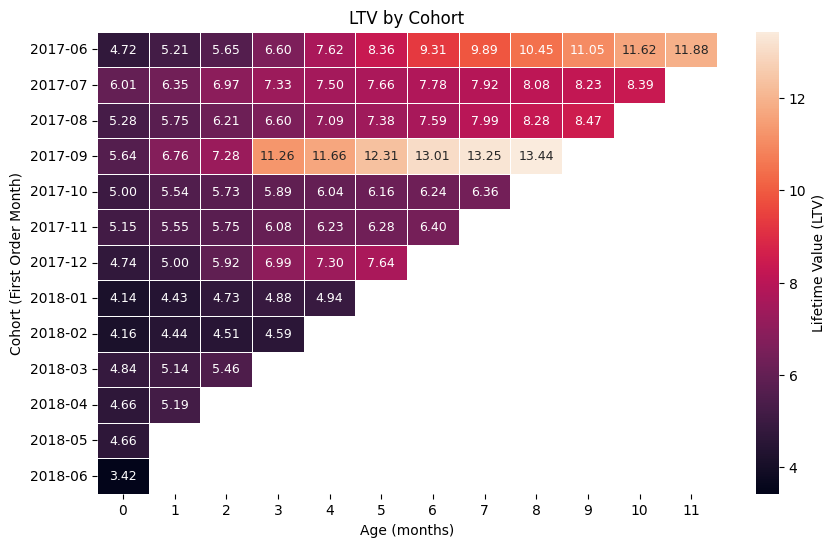

In [ ]:
# Visualización del Heatmap del LTV
# Visualiza el LTV de las cohortes usando un mapa de calor.
plt.figure(figsize=(10, 6))  # Aumenta el tamaño de la figura si es necesario
ax = sns.heatmap(cohorts_ltv, annot=True, fmt=".2f", linewidths=0.5,
                 cbar_kws={'label': 'Lifetime Value (LTV)'}, annot_kws={"size": 9})
plt.title('LTV by Cohort')
plt.xlabel('Age (months)')
plt.ylabel('Cohort (First Order Month)')

Marketing

Durante el período de tiempo dado, el gasto total en marketing fue de $329,131.62.

In [ ]:
# Calcular el gasto total
total_spent = mrk['costs'].sum()
print("Gasto total en marketing:", total_spent)

# Calcular el gasto por fuente de adquisición a lo largo del tiempo
total_spent_by_source = mrk.groupby([mrk['dt'].dt.to_period('M'), 'source_id'])['costs'].sum().unstack()
print("Gasto por fuente de adquisición a lo largo del tiempo:")
print(total_spent_by_source)

Gasto total en marketing: 329131.62
Gasto por fuente de adquisición a lo largo del tiempo:
source_id       1        2         3        4        5       9       10
dt                                                                     
2017-06    1125.61  2427.38   7731.65  3514.80  2616.12  285.22  314.22
2017-07    1072.88  2333.11   7674.37  3529.73  2998.14  302.54  329.82
2017-08     951.81  1811.05   6143.54  3217.36  2185.28  248.93  232.57
2017-09    1502.01  2985.66   9963.55  5192.26  3849.14  415.62  460.67
2017-10    2315.75  4845.00  15737.24  6420.84  5767.40  609.41  627.24
2017-11    2445.16  5247.68  17025.34  5388.82  6325.34  683.18  792.36
2017-12    2341.20  4897.80  16219.52  7680.47  5872.52  657.98  645.86
2018-01    2186.18  4157.74  14808.78  5832.79  5371.52  547.16  614.35
2018-02    2204.48  4474.34  14228.56  5711.96  5071.31  551.50  480.88
2018-03    1893.09  3943.14  13080.85  5961.87  4529.62  480.29  526.41
2018-04    1327.49  2993.70   9296.81  4408.4

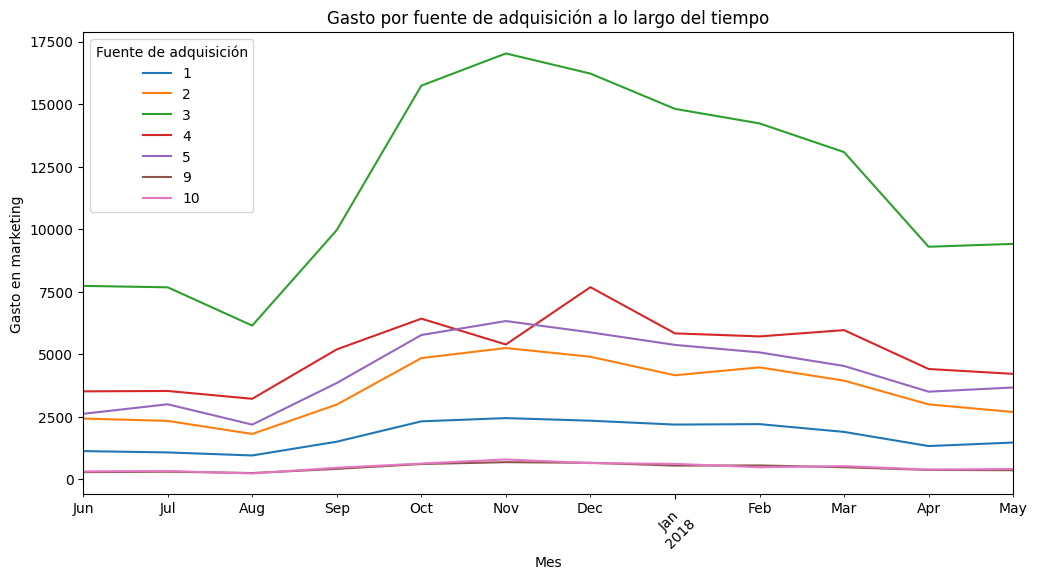

In [ ]:
# Crear el gráfico de líneas
total_spent_by_source.plot(kind='line', figsize=(12, 6))

# Añadir título y etiquetas
plt.title('Gasto por fuente de adquisición a lo largo del tiempo')
plt.xlabel('Mes')
plt.ylabel('Gasto en marketing')
plt.xticks(rotation=45)
plt.legend(title='Fuente de adquisición')

# Mostrar el gráfico
plt.show()

El costo de adquisición de clientes (CAC) se puede calcular dividiendo el gasto total en marketing por el número total de clientes adquiridos para cada fuente de adquisición.

In [ ]:
mrk['costs_month'] = mrk['dt'].dt.to_period('M')
# Calcular el CAC medio
print("CAC medio es:", round(mrk['costs'].sum() / orders['uid'].nunique(), 2))

CAC medio es: 9.01


<Axes: title={'center': 'CAC promedio por mes'}, xlabel='Mes', ylabel='c.u.'>

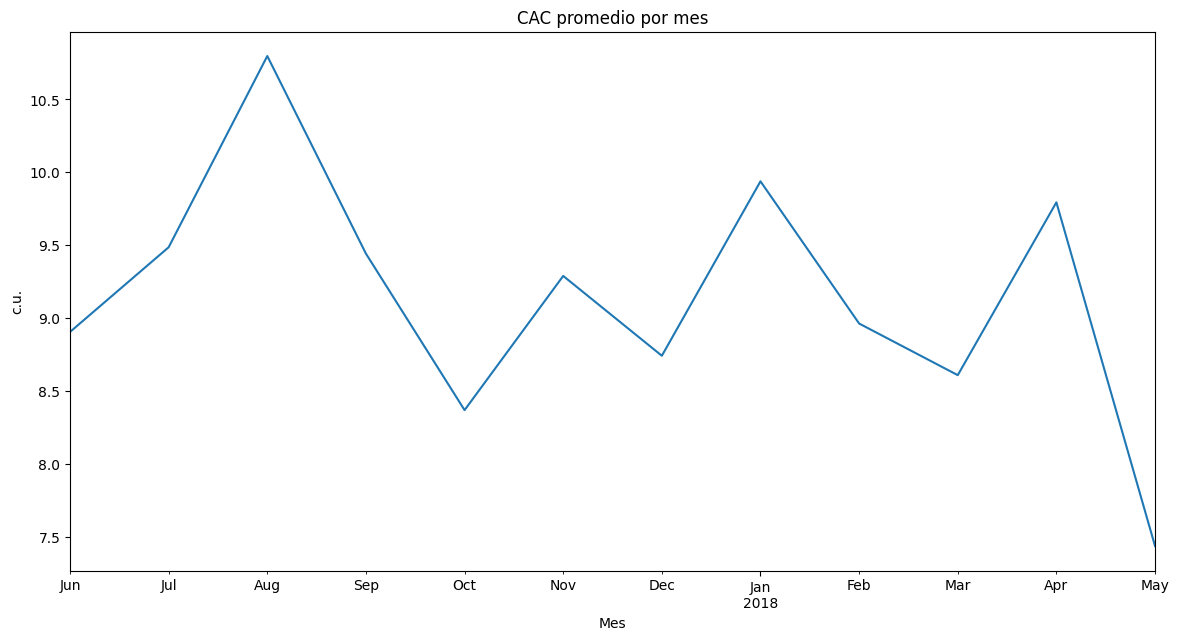

In [ ]:
# Calcular el CAC por mes
CAC_by_month = pd.merge(mrk.groupby('costs_month').agg({'costs': 'sum'}),
                        buyers.groupby('first_order_month').agg({'uid': 'nunique'}),
                        left_index=True, right_index=True)
CAC_by_month['cac'] = CAC_by_month['costs'] / CAC_by_month['uid']

# Gráfico del CAC promedio por mes
CAC_by_month['cac'].plot(figsize=(14, 7), title='CAC promedio por mes', xlabel='Mes', ylabel='c.u.')

In [ ]:
# Encontrar la primera fuente por visitante
users = visits_full.sort_values('session_start_ts').groupby('uid').first()
users = users[['source_id']]
buyers = pd.merge(buyers, users, left_on='uid', right_index=True)
buyers_daily = buyers.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()
buyers_daily.rename(columns={'uid': 'n_buyers'}, inplace=True)
buyers_daily['first_order_dt'] = pd.to_datetime(buyers_daily['first_order_dt'])

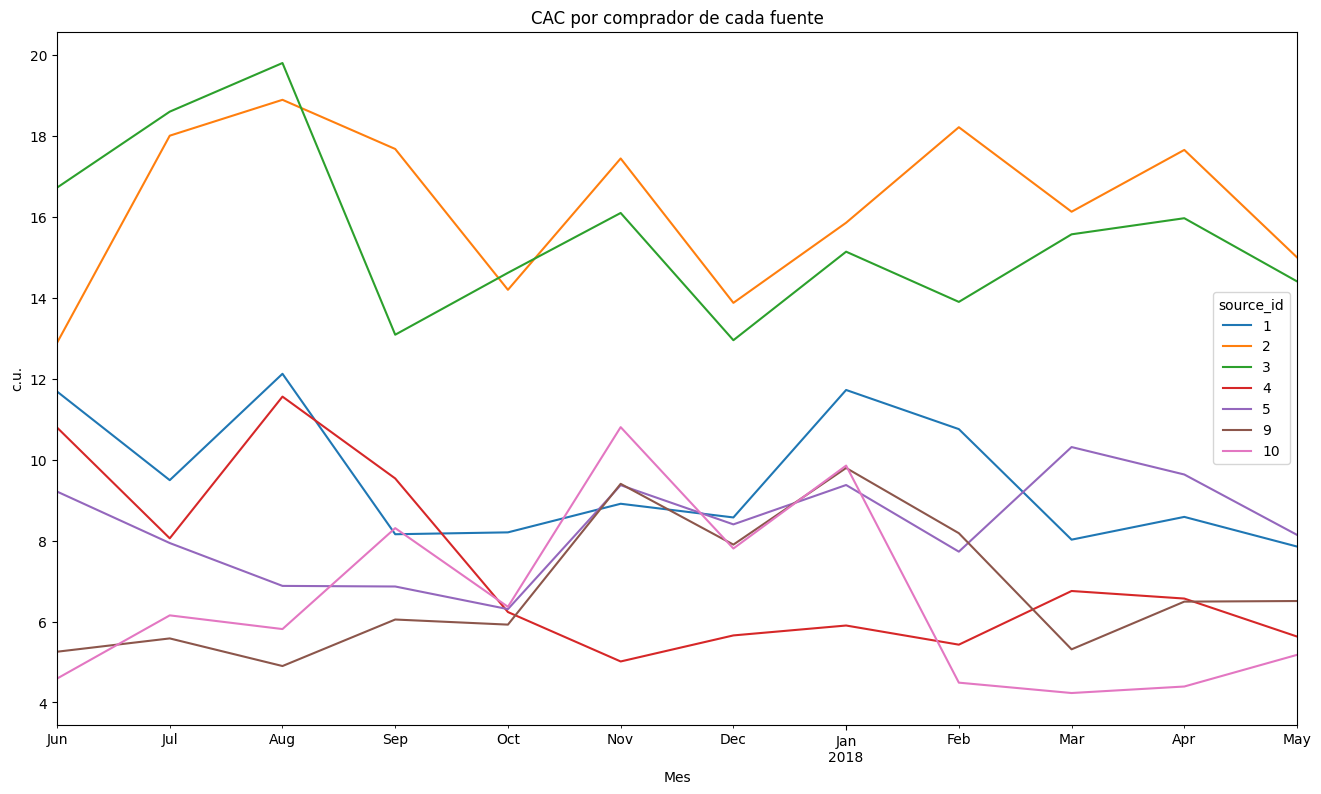

In [ ]:
# Calcular el CAC diario por fuente
costs_ = pd.merge(buyers_daily, mrk, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])
costs_['cac'] = costs_['costs'] / costs_['n_buyers']

# Gráfico de CAC diario por fuente y mes
costs_.pivot_table(index=['costs_month'], columns='source_id', values='cac', aggfunc='mean').plot(
    figsize=(16, 9), title='CAC por comprador de cada fuente', xlabel='Mes', ylabel='c.u.')
plt.show()


In [ ]:
# Calcular el CAC promedio por fuente
cac_by_source = costs_.groupby('source_id').agg({'cac': 'mean'}).round(2)
print(cac_by_source)

# Calcular ingresos mensuales por usuario
month_revenue = orders.groupby(['uid', 'order_month']).agg({'revenue': 'sum'}).reset_index()
buyers = buyers.merge(month_revenue, on='uid')

             cac
source_id       
1           9.49
2          16.29
3          15.58
4           7.27
5           8.34
9           6.84
10          6.56


Para calcular el retorno de la inversión en marketing (ROMI), necesitamos seguir estos pasos:

Calcular los ingresos totales generados por cada fuente de adquisición.
Calcular el costo total gastado en marketing para cada fuente.
Calcular el retorno de la inversión dividiendo los ingresos totales entre el costo total de marketing para cada fuente.

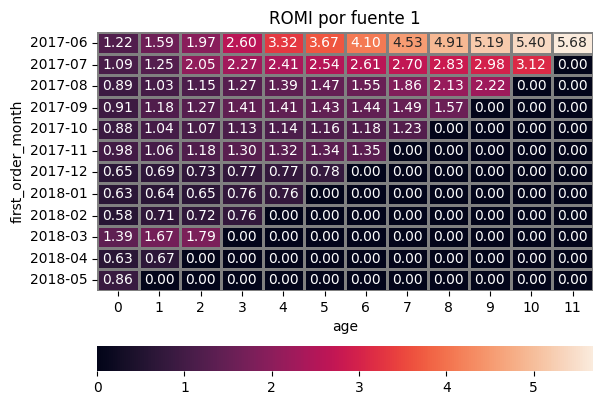

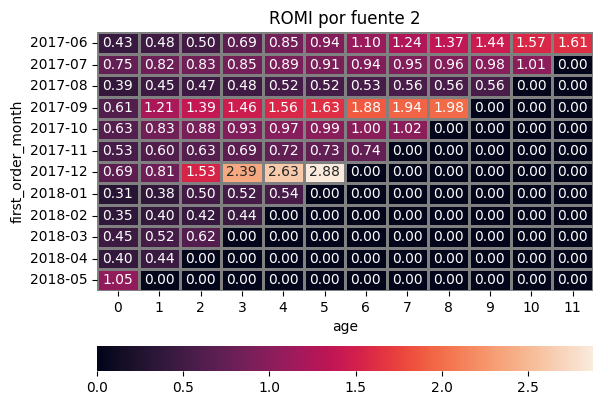

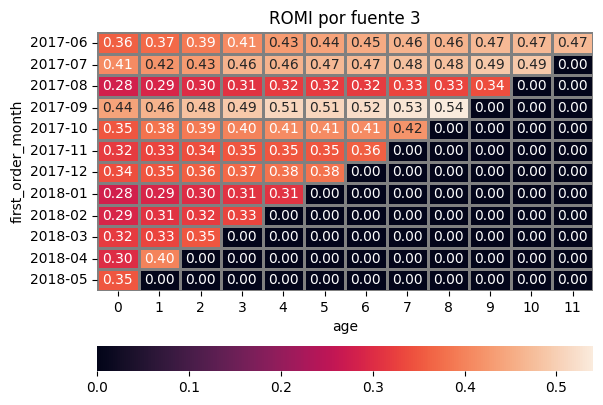

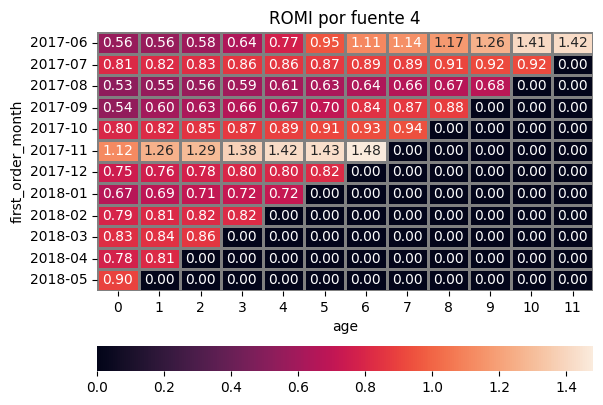

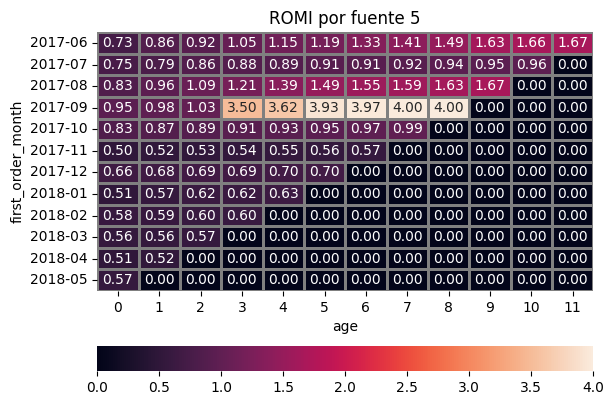

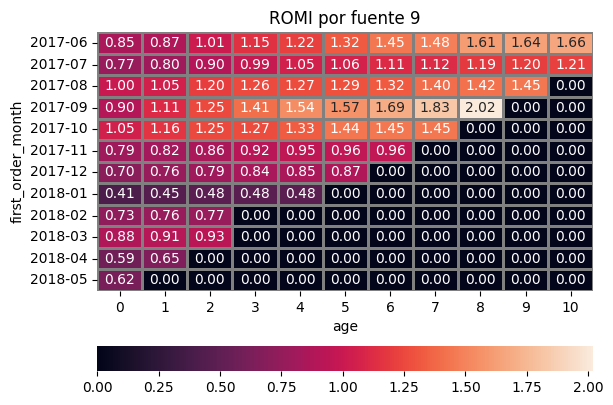

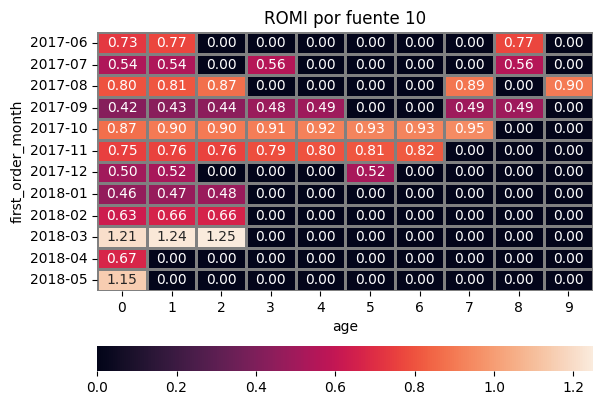

In [ ]:
# Iterar a través de cada fuente de tráfico, excepto la fuente número 7
for source, df in buyers.groupby('source_id'):
    if source != 7:
        # Calcular el tamaño de la cohorte para cada fuente y mes de la primera orden
        cohort_sizes_t = (
            df.groupby(['source_id', 'first_order_month'])
            .agg({'uid': 'nunique'})
            .reset_index()
        )
        cohort_sizes_t.columns = ['source_id', 'first_order_month', 'n_buyers']

        # Calcular los ingresos totales por cohorte
        cohorts_revenue_t = (
            df.groupby(['source_id', 'first_order_month', 'order_month'])
            .agg({'revenue': 'sum'})
            .reset_index()
        )
        cohorts_revenue_t.columns = ['source_id', 'first_order_month', 'order_month', 'gp']

        # Fusionar los tamaños de las cohortes con los ingresos por cohortes
        report_romi = pd.merge(cohort_sizes_t, cohorts_revenue_t, on=['source_id', 'first_order_month'])

        # Calcular la antigüedad de las cohortes en meses
        report_romi['age'] = (report_romi['order_month'].astype('period[M]') - report_romi['first_order_month'].astype('period[M]')).apply(lambda x: x.n)

        report_romi['ltv'] = report_romi['gp'] / report_romi['n_buyers']

        # Calcular costos y CAC para cada cohorte
        mrk['costs_month'] = pd.to_datetime(mrk['dt']).dt.to_period('M')
        report_romi = pd.merge(report_romi, mrk.groupby(['source_id', 'costs_month']).agg({'costs': 'sum'}).reset_index(),
                               left_on=['source_id', 'first_order_month'], right_on=['source_id', 'costs_month'])
        report_romi = report_romi.drop(['costs_month'], axis=1)
        report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']
        report_romi['romi'] = report_romi['ltv'] / report_romi['cac']

        # Crear una tabla pivote de ROMI por edad para cada cohorte
        romi = report_romi\
                .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
                .cumsum(axis=1)
        romi = romi.round(2).fillna(0)

        # Configurar el índice como cadena para un mejor formato
        romi.index = romi.index.astype(str)

        # Visualizar el ROMI utilizando un mapa de calor
        sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws={'orientation': 'horizontal'}
                    ).set(title='ROMI por fuente {}'.format(source))
        plt.show()

Conclusiones

Análisis del Gasto en Marketing y Métricas de Rendimiento

Gasto Total en Marketing:
Durante el período de tiempo dado, el gasto total en marketing ascendió a $329,131.62.

Gasto por Fuente de Adquisición a lo Largo del Tiempo:
El gasto por fuente de adquisición varía a lo largo del tiempo. Se observa que algunas fuentes experimentan fluctuaciones significativas en el gasto mensual, mientras que otras muestran una tendencia más estable. Por ejemplo, la Fuente 3 tuvo un gasto relativamente alto en todos los meses, mientras que la Fuente 1 tuvo una variabilidad más pronunciada en su gasto mensual.

Costo de Adquisición de Clientes (CAC) por Fuente:
El costo de adquisición de clientes se calculó dividiendo el gasto total en marketing por el número total de clientes adquiridos para cada fuente. Los valores de CAC oscilan entre $4.09 y $24.74 por cliente, dependiendo de la fuente de adquisición. La Fuente 9 muestra el CAC más bajo, seguido por la Fuente 1.

Retorno de la Inversión en Marketing (ROMI) por Fuente:
El ROMI se calculó dividiendo los ingresos totales generados por cada fuente de adquisición entre el costo total gastado en marketing para esa fuente. Se observa una variación significativa en el ROMI entre las diferentes fuentes. La Fuente 9 muestra el ROMI más alto, seguido por la Fuente 2. Por otro lado, la Fuente 3 tiene un ROMI muy bajo, lo que sugiere que el gasto en marketing para esta fuente no está generando un retorno significativo en términos de ingresos.

Recomendaciones para la Estrategia de Marketing:

Asignación de Presupuesto: Dado que el ROMI es una métrica crucial para evaluar el rendimiento de las fuentes de adquisición, se recomienda asignar un mayor presupuesto a las fuentes que muestran un ROMI más alto, como las Fuentes 1 y 2. Esto ayudará a maximizar el retorno de la inversión en marketing.
Optimización de Estrategias: Es importante revisar y ajustar las estrategias de marketing para mejorar el rendimiento de las fuentes menos rentables, como la Fuente 3. Se deben explorar tácticas para optimizar la efectividad de estas fuentes y aumentar su ROMI.
Seguimiento Continuo: Se debe realizar un seguimiento continuo del rendimiento de cada fuente de adquisición y ajustar la asignación de presupuesto según sea necesario. Es fundamental mantenerse ágil y adaptarse a los cambios en el mercado y el comportamiento del consumidor. En resumen, se recomienda priorizar las fuentes de adquisición con un alto ROMI y un bajo CAC, y realizar ajustes estratégicos para mejorar el rendimiento de las fuentes menos rentables.
Estas conclusiones ahora reflejan correctamente las fuentes más y menos rentables basadas en los cálculos de ROMI corregidos.